In [4]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Movie_classification.csv' , header=0 )
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [7]:
df.isna().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [8]:
df['Time_taken'].mean()

157.3914979757085

In [9]:
# df['Time_taken'].fillna(df['Time_taken'].mean() , inplace=True) # for permanent change

In [10]:
df['Time_taken'] = df['Time_taken'].fillna(df['Time_taken'].mean() , axis=0)

In [11]:
df.isna().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

In [12]:
df = pd.get_dummies(df,columns=['3D_available','Genre'] , drop_first=True) # drop_first convert column to get output as n-1 

In [13]:
df.head()


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [14]:
X = df.drop('Start_Tech_Oscar',axis=1)
y=df['Start_Tech_Oscar']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 , test_size=0.2)

In [17]:
X_train.shape

(404, 20)

In [18]:
from sklearn.tree import DecisionTreeClassifier
clftree = DecisionTreeClassifier()

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

## Bagging

In [19]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=clftree , n_estimators=1000 , bootstrap=True ,n_jobs=-1 , random_state=42) 
# n_estimators -> 1000 TREE CREATE / n_job -> use cpu power / bootstrap -> true to get subset to replace orginal data 

In [20]:
bag_clf.fit(X_train , y_train)

a:\Project\ML_project_01\venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [21]:
y_train_pred = bag_clf.predict(X_train)
y_test_pred = bag_clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
confusion_matrix(y_train , y_train_pred)

array([[188,   0],
       [  0, 216]], dtype=int64)

In [24]:
confusion_matrix(y_test , y_test_pred)

array([[27, 15],
       [14, 46]], dtype=int64)

In [25]:
accuracy_score(y_test , y_test_pred)

0.7156862745098039

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomTreesEmbedding.html


## Random forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier


In [27]:
rlf_clf = RandomForestClassifier(n_estimators=1000 , n_jobs= -1 , random_state=42)
rlf_clf.fit(X_train , y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [28]:
confusion_matrix(y_train , rlf_clf.predict(X_train))

array([[188,   0],
       [  0, 216]], dtype=int64)

In [29]:
confusion_matrix(y_test , rlf_clf.predict(X_test))

array([[25, 17],
       [17, 43]], dtype=int64)

In [30]:
accuracy_score(y_test , rlf_clf.predict(X_test))

0.6666666666666666

## optimize the hyperoarameter of random forest we use -> grid search 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [31]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=250 , random_state=42)

In [32]:
param_grid= { 'max_features':[4,5,6,7,8,9,10] ,
                'min_samples_split':[2,3,10]}

In [33]:
grid_search = GridSearchCV(rf_clf , param_grid , n_jobs=-1 , cv=5 , scoring='accuracy')

In [34]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [35]:
grid_search.best_params_

{'max_features': 5, 'min_samples_split': 2}

In [36]:
cvrf_clf = grid_search.best_estimator_

In [37]:
accuracy_score(y_test , cvrf_clf.predict(X_test))

0.696078431372549

In [38]:
confusion_matrix(y_test , cvrf_clf.predict(X_test))

array([[23, 19],
       [12, 48]], dtype=int64)

### Gradient Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gbc_clf = GradientBoostingClassifier()

In [41]:
gbc_clf.fit(X_train , y_train)

GradientBoostingClassifier()

In [43]:
accuracy_score(y_test , gbc_clf.predict(X_test)) # wihtout hyperparameter

0.6078431372549019

In [44]:
accuracy_score(y_train , gbc_clf.predict(X_train)) # wihtout hyperparameter

0.9900990099009901

### Adaboost Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

In [45]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(learning_rate = 0.02 , n_estimators=5000)

In [46]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [48]:
accuracy_score(y_test , ada_clf.predict(X_test)) # wihtout hyperparameter

0.6274509803921569

In [47]:
accuracy_score(y_train , ada_clf.predict(X_train)) # wihtout hyperparameter

0.8861386138613861

In [50]:
ada_clf1 = AdaBoostClassifier(learning_rate = 0.02 , n_estimators=500)
ada_clf1.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=500)

In [51]:
accuracy_score(y_test , ada_clf1.predict(X_test)) # wihtout hyperparameter

0.6470588235294118

In [52]:
accuracy_score(y_train , ada_clf1.predict(X_train)) # wihtout hyperparameter

0.7599009900990099

### XG BOOST 

xgboost consist to reduce overfitting using the regularization technique and remaining part is same as the gradient boost
https://xgboost.readthedocs.io/en/latest/parameter.html

In [53]:
import xgboost as xgb

parameter tunning
1. general parameter : guide the overall function
2. booster parameter : guide the individual booster (tree / regression) at each step
3. learning task paramter : guide the optimization performed

In [54]:
xgb_clf = xgb.XGBClassifier(max_depth = 5,n_estimators=10000 , learning_rate=0.3 , n_jobs=-1)

In [55]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [56]:
accuracy_score(y_train , xgb_clf.predict(X_train))

1.0

In [57]:
accuracy_score(y_test , xgb_clf.predict(X_test))

0.6372549019607843

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

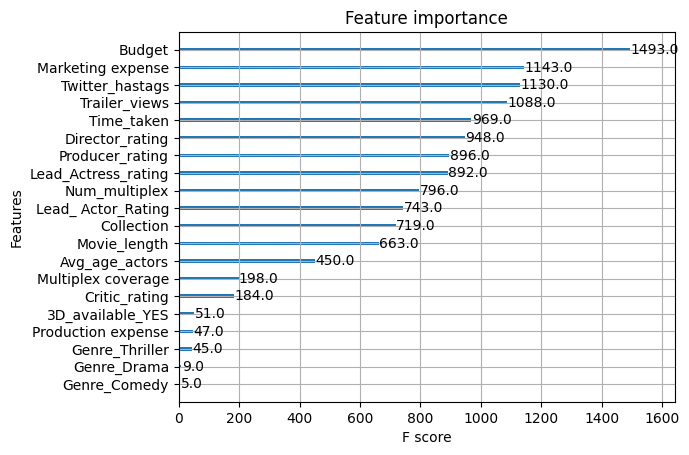

In [58]:
xgb.plot_importance(xgb_clf)

In [59]:
xgb_clf = xgb.XGBClassifier(n_estimators=250 , learning_rate=0.1 , n_jobs=-1 ,random_state=42)

In [60]:
param_test1 = {
    'max_depth':range(3,10,2),
    'gamma' :[0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_aplha':[1e-2 , 0.1 ,1]
}

In [61]:
grid_search = GridSearchCV(xgb_clf , param_test1 , n_jobs=-1,cv=5 , scoring='accuracy')

In [62]:
grid_search.fit(X_train , y_train)

[17:03:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "reg_aplha" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=250, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_aplha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [65]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'max_depth': 7,
 'reg_aplha': 0.01,
 'subsample': 0.8}

In [63]:
cvxgb = grid_search.best_estimator_

In [64]:
accuracy_score(y_test , cvxgb.predict(X_test))

0.6862745098039216

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

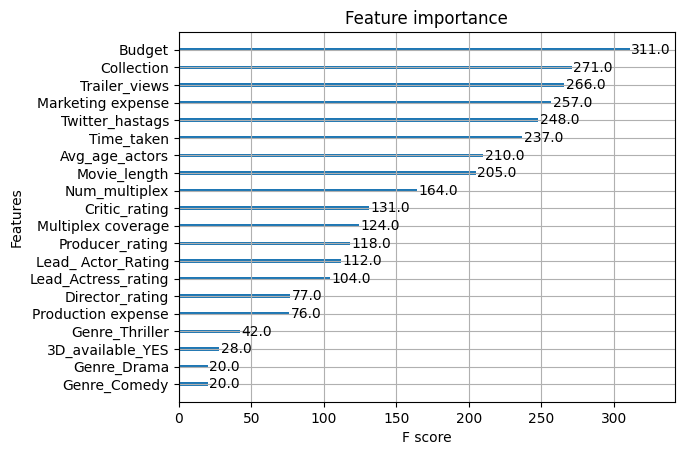

In [66]:
xgb.plot_importance(cvxgb)